In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import catboost as cb
import warnings
warnings.filterwarnings('ignore')

In [105]:
df1 = pd.read_csv(r"C:\Users\91700\Desktop\sentiment\emotion_dataset_2.csv")
df1['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [5]:
df = pd.read_csv(r"C:\Users\91700\Desktop\sentiment\emotion_dataset_raw.csv")

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [8]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [147]:
x1 = df[df['Emotion'] == 'sadness'].sample(4000)
x2 = df[df['Emotion'] == 'fear']
x3 = df[df['Emotion'] == 'anger']
x4 = df[df['Emotion'] == 'surprise']
x5 = df[df['Emotion'] == 'neutral'].sample(4000,replace=True)
x6 = df[df['Emotion'] == 'disgust'].sample(3000,replace=True)
x7 = df[df['Emotion'] == 'joy'].sample(4000)

In [148]:
type(x6)

pandas.core.frame.DataFrame

In [149]:
new_df = pd.concat([x1,x2,x3,x4,x5,x6,x7])

In [150]:
new_df.shape

(27058, 3)

In [152]:
new_df['Emotion'].value_counts()

fear        4266
surprise    4015
sadness     4000
neutral     4000
joy         4000
anger       3777
disgust     3000
Name: Emotion, dtype: int64

<AxesSubplot: xlabel='Emotion', ylabel='count'>

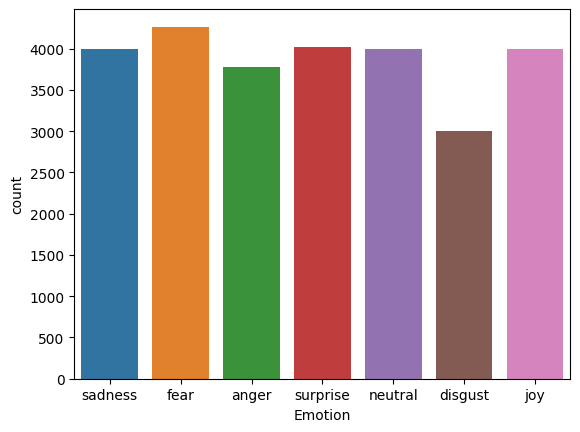

In [153]:
sns.countplot(x= 'Emotion',data = new_df)

In [49]:
# dir(nfx)

In [154]:
new_df['Clean_text'] = df['Text'].apply(nfx.remove_userhandles)

new_df['Clean_text'] = new_df['Clean_text'].apply(nfx.remove_stopwords)

new_df['Clean_text'] = new_df['Clean_text'].apply(nfx.remove_puncts)

new_df['Clean_text'] = new_df['Clean_text'].apply(nfx.remove_special_characters)

In [157]:
new_df.isna().sum()

Emotion       0
Text          0
Clean_text    0
dtype: int64

In [159]:
new_df[new_df.duplicated()].head()

,Emotion,Text,Clean_text
14174,neutral,It's scary .,scary
14174,neutral,It's scary .,scary
29111,neutral,The works ?,works
23574,neutral,Hey !,Hey
23560,neutral,"Yes , why ?",Yes


In [162]:
new_df = new_df.drop_duplicates(keep='first')

In [163]:
new_df.shape

(22265, 3)

In [164]:
x = new_df['Clean_text']
y = new_df['Emotion']

In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)

In [188]:
from sklearn.pipeline import Pipeline

In [189]:
pipe_lr = Pipeline(steps = 
                  [('cv',CountVectorizer()),
                   ('lr',LogisticRegression())
                  ])

In [190]:
pipe_lr2 = Pipeline(steps = 
                  [('cv',CountVectorizer()),
                   ('cat',cb.CatBoostClassifier(iterations=50))
                  ])



In [191]:
pipe_lr3 = Pipeline(steps = 
                  [('cv',CountVectorizer()),
                   ('rd',RandomForestClassifier())
                  ])


In [192]:
pipe_lr1 = Pipeline(steps = 
                  [('tf',TfidfVectorizer()),
                   ('lr',LogisticRegression())
                  ])

In [195]:
pipe_lr.fit(x_train,y_train)


pipe_lr.score(x_test,y_test)

0.5401976195823041

In [176]:
pipe_lr1.fit(x_train,y_train)

pipe_lr1.score(x_test,y_test)

0.5374251497005988

In [177]:
pipe_lr3.fit(x_train,y_train)

pipe_lr3.score(x_test,y_test)

0.4847305389221557

In [178]:
ex1 = "My name is khan and I am not a terrorist"
ex2 = "I love my mother so much"
ex3 = "I am ashamed of it."
ex4 = "you are a bad man"

In [206]:
print(pipe_lr.predict([ex4]))
print(pipe_lr.predict([ex1]))
print(pipe_lr.predict([ex3]))
print(pipe_lr.predict([ex2]))

['sadness']
['fear']
['fear']
['joy']


In [181]:
pipe_lr.predict_proba([ex1])

array([[0.08360155, 0.05588517, 0.34094405, 0.26389438, 0.03514551,
        0.08319492, 0.13733442]])

In [180]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype=object)

In [196]:
import pickle


In [197]:


pickle.dump(pipe_lr, open('lr.pkl', 'wb'))
